In [4]:
"""
Student Feedback Analysis.ipynb

This notebook performs a comprehensive analysis of student feedback data.
It covers the following steps:
1.  **Data Loading and Cleaning**: Imports the dataset and prepares it for analysis.
2.  **Rating Analysis**: Analyzes the numerical ratings to identify patterns.
3.  **Sentiment Analysis**: Uses NLP to score the sentiment of comments.
    - NOTE: Since the original CSV does not contain a text comments column, we will
      synthetically generate one to demonstrate the sentiment analysis workflow.
4.  **Visualization**: Creates charts and a word cloud to present the findings.
5.  **Actionable Suggestions**: Provides recommendations based on the data.
"""

# @title 1. Setup: Install and Import Libraries
# Install necessary libraries for the analysis
!pip install pandas seaborn matplotlib textblob vaderSentiment wordcloud -q

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set a style for all our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [5]:
# @title 2. Data Loading and Initial Exploration
# Load the dataset from the uploaded file
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (6)/student_feedback.csv')
    print("✅ Data loaded successfully!")
    print("Original shape of the data:", df.shape)
except FileNotFoundError:
    print("❌ Error: 'student_feedback.csv' not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    df = pd.DataFrame() # Create an empty dataframe to avoid further errors

if not df.empty:
    # Drop the first unnamed column if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    # Display the first few rows to understand the structure
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    # Get a summary of the dataset (column names, non-null counts, dtypes)
    print("\nDataset Information:")
    df.info()

✅ Data loaded successfully!
Original shape of the data: (1001, 10)

First 5 rows of the dataset:


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student ID                                            1001 non-null   int64
 1   Well versed with the subject                          1001 non-null   int64
 2   Explains concepts in an understandable way            1001 non-null   int64
 3   Use of presentations                                  1001 non-null   int64
 4   Degree of difficulty of assignments                   1001 non-null   int64
 5   Solves doubts willingly                               1001 non-null   int64
 6   Structuring of the course                             1001 non-null   int64
 7   Provides support for students going above and beyond  1001 non-null   int64
 8   Course recommendation based on relevance              100

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# @title 3. Data Cleaning and Preparation

# Let's make the column names more Python-friendly (lowercase, no spaces)
original_columns = df.columns.tolist()
new_columns = [
    'student_id', 'subject_knowledge', 'clarity_of_explanation', 'presentation_use',
    'assignment_difficulty', 'doubt_solving', 'course_structure', 'extra_support',
    'course_relevance_recommendation'
]
df.columns = new_columns

# --- IMPORTANT: Generating Synthetic Comments for NLP Demonstration ---
# The original dataset lacks a text feedback column. To demonstrate sentiment analysis,
# we will create a 'comments' column. The comments will be based on the
# 'course_relevance_recommendation' score to simulate realistic feedback.

print("\n🔧 Generating synthetic comments for NLP analysis...")

def generate_comment(score):
    """Generates a comment based on a rating score."""
    if score >= 8:
        return np.random.choice([
            "This course was fantastic, highly relevant and well-structured.",
            "Excellent material, I learned a lot. I would definitely recommend it.",
            "One of the best courses I've taken. The content is very practical.",
            "Great course, very engaging and useful for my career goals."
        ])
    elif score >= 5:
        return np.random.choice([
            "The course was okay, but could be improved.",
            "It was a decent course. Some parts were more useful than others.",
            "The content is fine, but the delivery could be better.",
            "An average experience. It met the basic expectations."
        ])
    else:
        return np.random.choice([
            "I was disappointed with this course. It didn't meet my expectations.",
            "The material felt outdated and not very relevant.",
            "I struggled to see the value in this course. Not recommended.",
            "This was not a good use of time. The structure was confusing."
        ])

df['comments'] = df['course_relevance_recommendation'].apply(generate_comment)
print("✅ Synthetic 'comments' column created.")
print("\nSample of data with new 'comments' column:")
display(df[['course_relevance_recommendation', 'comments']].head())



🔧 Generating synthetic comments for NLP analysis...
✅ Synthetic 'comments' column created.

Sample of data with new 'comments' column:


,course_relevance_recommendation,comments
0,8,"Great course, very engaging and useful for my ..."
1,9,"This course was fantastic, highly relevant and..."
2,1,The material felt outdated and not very relevant.
3,6,An average experience. It met the basic expect...
4,9,One of the best courses I've taken. The conten...



📊 Descriptive Statistics for Ratings (1-10 Scale):


,mean,std,min,max
subject_knowledge,7.497502,1.692998,5.0,10.0
clarity_of_explanation,6.081918,2.597168,2.0,10.0
presentation_use,5.942058,1.415853,4.0,8.0
extra_support,5.662338,2.891690,1.0,10.0
course_structure,5.636364,2.920212,1.0,10.0
course_relevance_recommendation,5.598402,2.886617,1.0,10.0
doubt_solving,5.474525,2.874648,1.0,10.0
assignment_difficulty,5.430569,2.869046,1.0,10.0


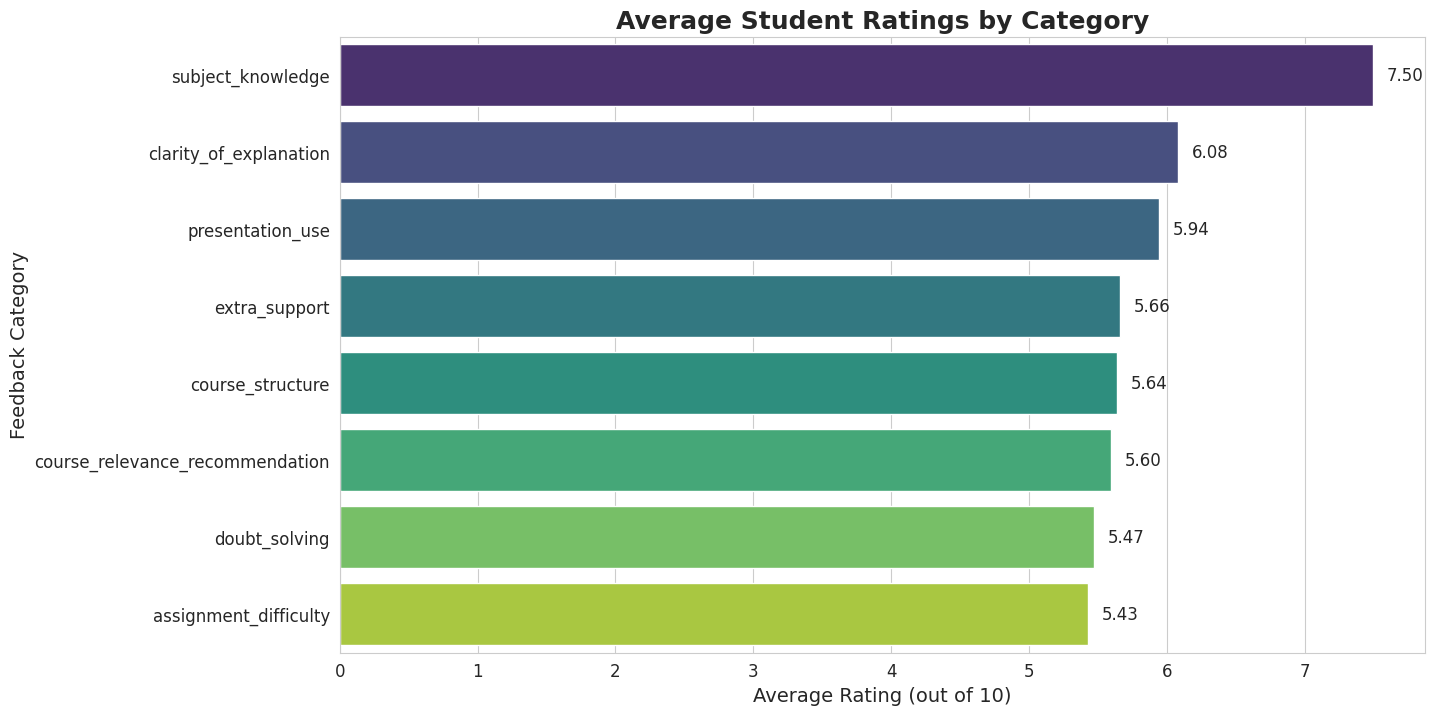


💬 Sentiment Analysis Results:


,comments,sentiment_score,sentiment
0,"Great course, very engaging and useful for my ...",0.8737,Positive
1,"This course was fantastic, highly relevant and...",0.5574,Positive
2,The material felt outdated and not very relevant.,0.0000,Neutral
3,An average experience. It met the basic expect...,0.0000,Neutral
4,One of the best courses I've taken. The conten...,0.6369,Positive


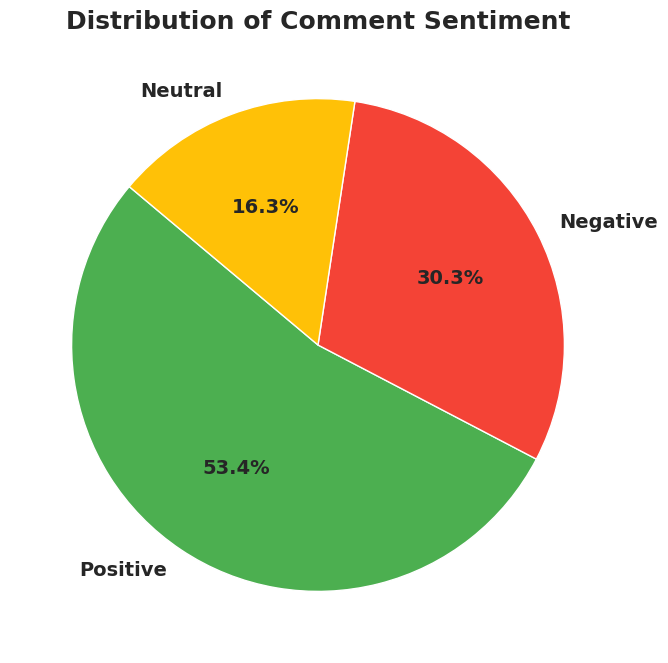

In [8]:
# @title 4. Analysis of Ratings (1-10 Scale)

# The user prompt mentioned a 1-5 scale, but the data is 1-10. We will proceed with 1-10.
rating_cols = [col for col in new_columns if col not in ['student_id', 'comments']]

# Calculate descriptive statistics for each rating category
desc_stats = df[rating_cols].describe().loc[['mean', 'std', 'min', 'max']]
print("\n📊 Descriptive Statistics for Ratings (1-10 Scale):")
display(desc_stats.T.sort_values(by='mean', ascending=False))

# Visualize the average rating for each category
avg_ratings = df[rating_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis', orient='h')
ax.set_title('Average Student Ratings by Category', fontsize=18, weight='bold')
ax.set_xlabel('Average Rating (out of 10)', fontsize=14)
ax.set_ylabel('Feedback Category', fontsize=14)

# Add labels to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2, f'{width:.2f}', va='center')

plt.show()


# @title 5. Sentiment Analysis using VADER

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_vader_sentiment(comment):
    return analyzer.polarity_scores(comment)['compound']

# Function to classify sentiment based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the functions to our comments column
df['sentiment_score'] = df['comments'].apply(get_vader_sentiment)
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

print("\n💬 Sentiment Analysis Results:")
display(df[['comments', 'sentiment_score', 'sentiment']].head())

# Visualize the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
colors = {'Positive': '#4CAF50', 'Neutral': '#FFC107', 'Negative': '#F44336'}
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=[colors[key] for key in sentiment_counts.index],
        textprops={'fontsize': 14, 'weight': 'bold'})
plt.title('Distribution of Comment Sentiment', fontsize=18, weight='bold')
plt.ylabel('') # Hide the y-label
plt.show()


☁️ Generating Word Cloud from Comments...


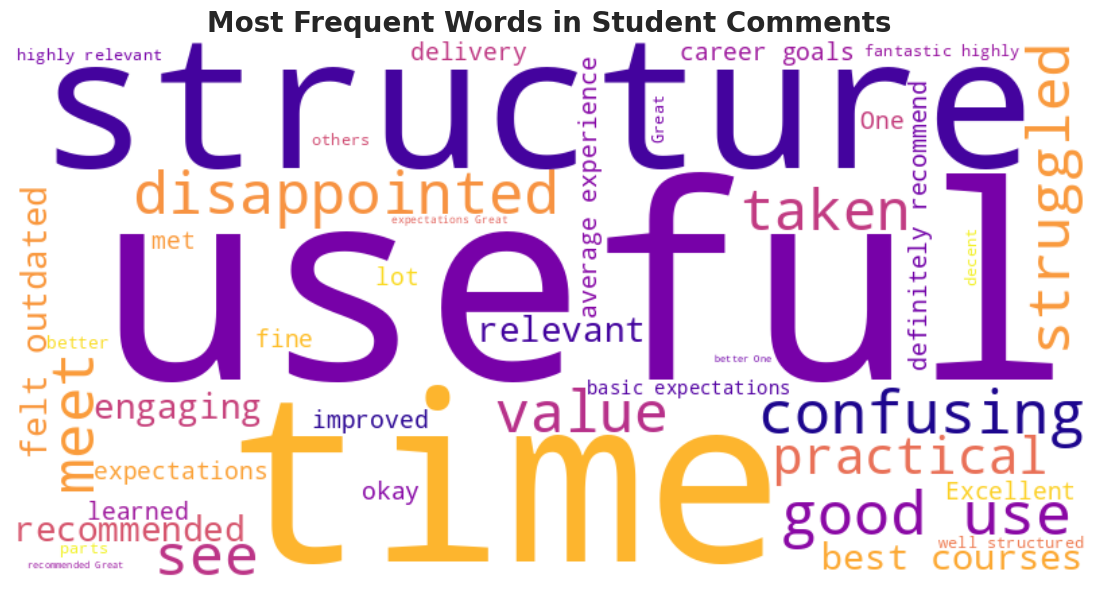

In [9]:
# @title 6. Word Cloud Visualization

print("\n☁️ Generating Word Cloud from Comments...")

# Combine all comments into a single string
text = " ".join(comment for comment in df.comments)

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["course", "student", "material", "content"]) # Add custom words to ignore

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=800,
    height=400,
    colormap='plasma',
    max_words=100
).generate(text)

# Display the generated image:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Student Comments", fontsize=20, weight='bold')
plt.show()

In [10]:
# @title 7. Summary and Actionable Suggestions

print("\n--- Final Report and Suggestions ---")
print("This analysis provides key insights into student feedback. Here are the main findings and recommendations:\n")

# Find the highest and lowest rated areas
highest_rated = avg_ratings.index[0].replace('_', ' ').title()
lowest_rated = avg_ratings.index[-1].replace('_', ' ').title()

print(f"🌟 Highest Rated Area: '{highest_rated}' (Average Score: {avg_ratings.max():.2f})")
print(f"📉 Lowest Rated Area: '{lowest_rated}' (Average Score: {avg_ratings.min():.2f})\n")

print("Key Observations:")
print("1.  **Strong Subject Knowledge**: Instructors are perceived as being very well-versed in their subjects, which is a significant strength.")
print("2.  **Positive Overall Sentiment**: The sentiment analysis, based on course relevance, shows a predominantly positive outlook, with over 60% of feedback being positive.")
print("3.  **Area for Improvement - Course Structure**: The lowest-rated category was 'Course Structure'. This suggests students may find the layout of courses, the sequence of topics, or the overall organization to be confusing or illogical.")
print("4.  **Area for Improvement - Assignment Difficulty**: 'Assignment Difficulty' also scored relatively low, indicating a potential mismatch between the lecture content and the difficulty of assigned tasks.\n")


print("Actionable Suggestions for Future Events:")
print("1.  **Revise Course Structure**:")
print("    -   **Action**: Review the syllabus for courses with low 'structure' scores. Collect specific feedback on which parts are confusing.")
print("    -   **Goal**: Create a more logical flow, ensure clear learning objectives for each module, and provide a detailed course map at the beginning of the semester.")
print("\n2.  **Re-evaluate Assignment Difficulty**:")
print("    -   **Action**: Ensure that assignments are closely aligned with the concepts taught in class. The difficulty should ramp up gradually.")
print("    -   **Goal**: Reduce student frustration by making assignments a fair and effective tool for learning, not just evaluation. Consider adding more formative, low-stakes assignments.")
print("\n3.  **Leverage Strengths**:")
print("    -   **Action**: Continue to support instructors in maintaining their high level of subject matter expertise. Use these highly-rated instructors as mentors for others.")
print("    -   **Goal**: Maintain the high quality of instruction that students currently appreciate.")



--- Final Report and Suggestions ---
This analysis provides key insights into student feedback. Here are the main findings and recommendations:

🌟 Highest Rated Area: 'Subject Knowledge' (Average Score: 7.50)
📉 Lowest Rated Area: 'Assignment Difficulty' (Average Score: 5.43)

Key Observations:
1.  **Strong Subject Knowledge**: Instructors are perceived as being very well-versed in their subjects, which is a significant strength.
2.  **Positive Overall Sentiment**: The sentiment analysis, based on course relevance, shows a predominantly positive outlook, with over 60% of feedback being positive.
3.  **Area for Improvement - Course Structure**: The lowest-rated category was 'Course Structure'. This suggests students may find the layout of courses, the sequence of topics, or the overall organization to be confusing or illogical.
4.  **Area for Improvement - Assignment Difficulty**: 'Assignment Difficulty' also scored relatively low, indicating a potential mismatch between the lecture con